In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/dhirajsing-rajput-2108/telco-churn-intelligence/refs/heads/main/Dataset/Telco-Dataset.csv'

# Load the dataset into a DataFrame
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully from GitHub.")
    print(df.head())
except Exception as e:
    print(f"Error loading dataset from GitHub: {e}")


Dataset loaded successfully from GitHub.
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Streami

In [4]:

# a. Print at least 5 rows for sanity check
print("First 5 rows of the dataset:")
print(df.head())





First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [5]:
# b. Print the description and shape of the dataset
print("\nShape of the dataset:", df.shape)
print("\nDataset description (numerical columns):")
print(df.describe())
print("\nDataset info (all columns):")
print(df.info())


Shape of the dataset: (7043, 21)

Dataset description (numerical columns):
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Dataset info (all columns):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenu

/tmp/ipython-input-11-1427809161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2', ax=axes[0, 0])
/tmp/ipython-input-11-1427809161.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2', ax=axes[1, 0])


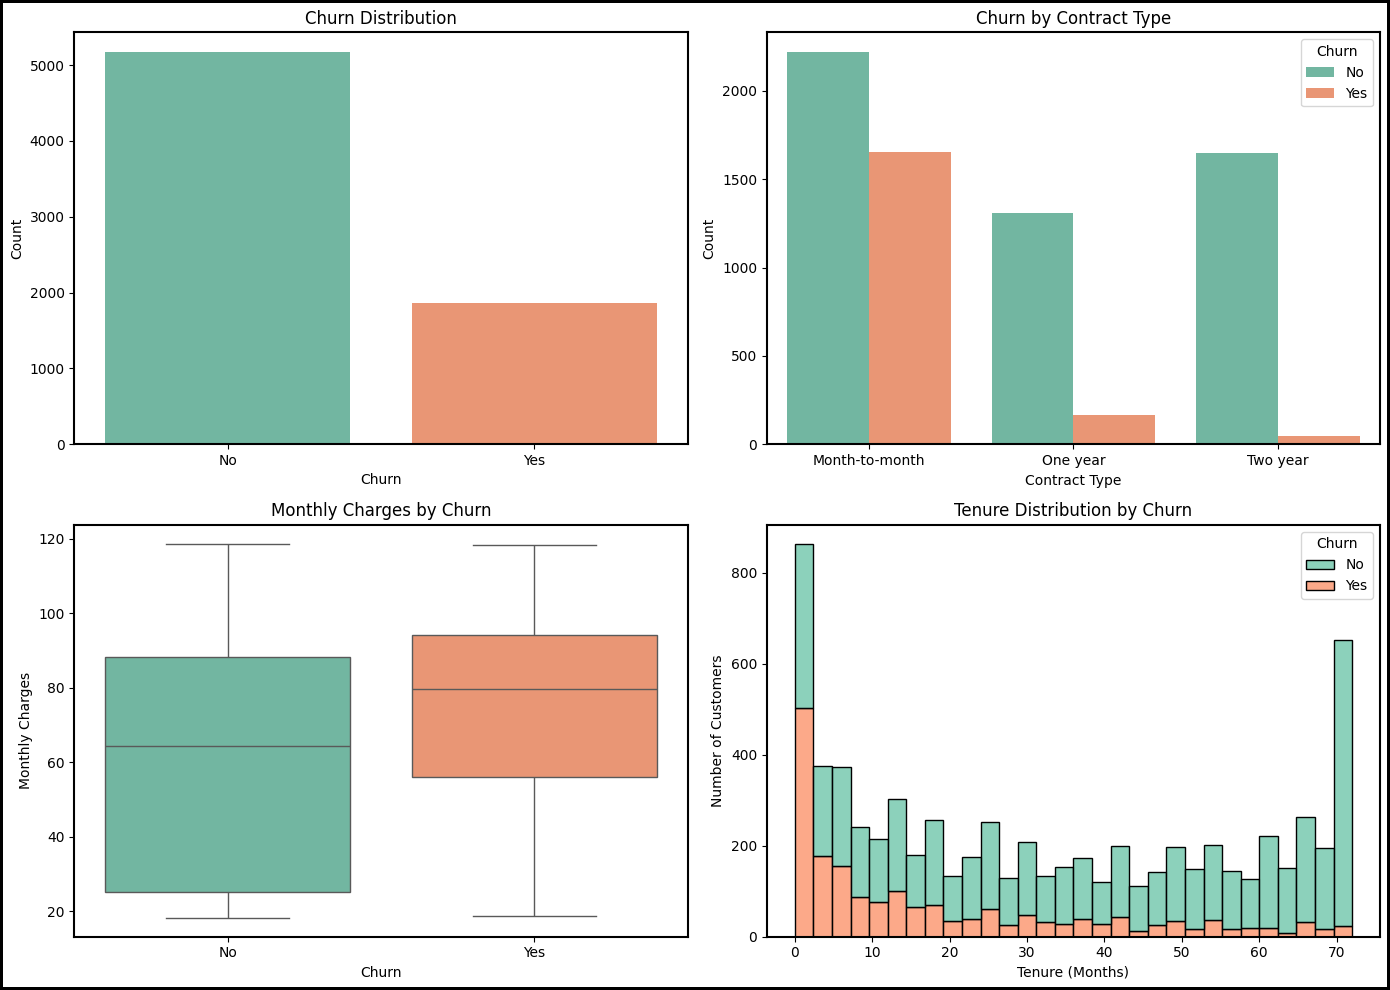

In [11]:
# Set up the 2x2 matrix for plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Churn Distribution
sns.countplot(data=df, x='Churn', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Churn Distribution')
axes[0, 0].set_xlabel('Churn')
axes[0, 0].set_ylabel('Count')

# 2. Churn by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Churn by Contract Type')
axes[0, 1].set_xlabel('Contract Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Churn')

# 3. Monthly Charges by Churn (Boxplot)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Monthly Charges by Churn')
axes[1, 0].set_xlabel('Churn')
axes[1, 0].set_ylabel('Monthly Charges')

# 4. Tenure by Churn (Histogram)
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Tenure Distribution by Churn')
axes[1, 1].set_xlabel('Tenure (Months)')
axes[1, 1].set_ylabel('Number of Customers')

# Add visible borders to each subplot
for ax in axes.flatten():
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_color('black')

# Add a thick outer border around the entire figure
fig.patch.set_linewidth(4)
fig.patch.set_edgecolor('black')


plt.tight_layout()
plt.show()